In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
plt.rcParams.update({'font.size': 16})

In [2]:
A = 2
def CDF(x):
    return 1/2 * A * x**2

def inverseCDF(r):
    return np.sqrt(2*r/A)

In [3]:
Nsamp = 1e7

values = np.zeros(int(Nsamp))
trials = range(int(Nsamp))

for i in trials:
    ro = r.random() # value between 0 and 1
    values[i] = inverseCDF(ro) # store randomly generated x's

In [4]:
print("mean", np.mean(values))
print("std", np.std(values))

mean 0.6665446571064012
std 0.23573837151617394


## Verify quantitatively that your random number generator works

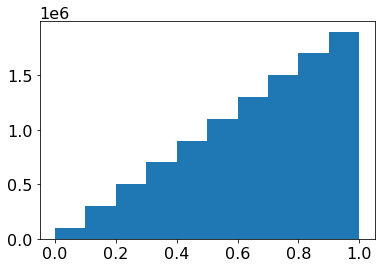

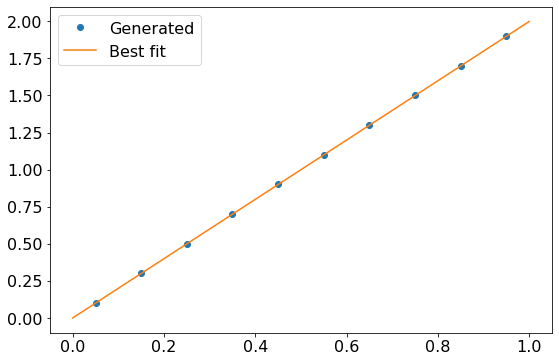

The slope of the generated dataset is:
1.9984340112806493 +/- 0.0008551145370536163


In [15]:
# Verify quantitatively that your random number generator works

hist = plt.hist(values)
plt.show()

randomly_gen_x = hist[0]
bin_edges = hist[1]

bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]

# normalize
norm = Nsamp*bin_widths
randomly_gen_x /= norm

# Fit a linear 

p = np.polyfit(bin_middles, randomly_gen_x, 1, full = False, cov = True)
x = np.linspace(0,1,100)

plt.figure(figsize=(9, 6))
#plt.title("Histogram for linear PDF")
plt.plot(bin_middles, randomly_gen_x/1000, "o", label="Generated")
plt.plot(x, p[0][0]*x/1000, label="Best fit")
plt.legend()
plt.show()

# error on the curve fit
sigma = np.sqrt(p[1][0, 0])

print("The slope of the generated dataset is:")
print(p[0][0]/1000, "+/-", sigma/1000)

## How might you attach an error bar to the histogram/cumulative histogram points? (e.g. the error associated with a certain fixed sample number).

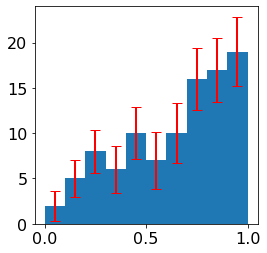

In [24]:
# repeat the simulation multiple times and get the standard deviation of each bin
#100 Samples
Nsamp=100
# runs 1,000 trials to find the number of counts in each of the 10 bins
counts=[]
for i in range(10):
    counts.append([])
for i in range(1000):
    rlist=np.zeros(int(Nsamp))
    for j in range(len(rlist)):
        rlist[j]=r.random()
    A=2
    xlist=inverseCDF(rlist)
    histogram=np.histogram(xlist, density=False)
    for j in range(len(histogram[0])):
        counts[j].append(histogram[0][j])
#calculates the middle of each bin for error bar plotting
bin_edges = hist[1]
bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]
#calculates the error as the standard deviation of the 1,000 trials
errors=[]
for i in counts:
    errors.append(np.std(np.array(i)))
#plots the histogram and error bars
plt.figure(figsize=(4,4))
histogram=plt.hist(xlist,range=[0,1])
plt.errorbar(bin_middles, histogram[0], yerr=errors, fmt='none', ecolor='red', elinewidth=2, capsize=5)
plt.show()

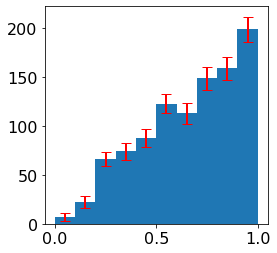

In [25]:
#1000 Samples
Nsamp=1000
# runs 1,000 trials to find the number of counts in each of the 10 bins
counts=[]
for i in range(10):
    counts.append([])
for i in range(1000):
    rlist=np.zeros(int(Nsamp))
    for j in range(len(rlist)):
        rlist[j]=r.random()
    A=2
    xlist=inverseCDF(rlist)
    histogram=np.histogram(xlist, density=False)
    for j in range(len(histogram[0])):
        counts[j].append(histogram[0][j])
#calculates the middle of each bin for error bar plotting
bin_edges = hist[1]
bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]
#calculates the error as the standard deviation of the 1,000 trials
errors=[]
for i in counts:
    errors.append(np.std(np.array(i)))
#plots the histogram and error bars
plt.figure(figsize=(4,4))
histogram=plt.hist(xlist,range=[0,1])
plt.errorbar(bin_middles, histogram[0], yerr=errors, fmt='none', ecolor='red',elinewidth=2, capsize=5)
plt.show()

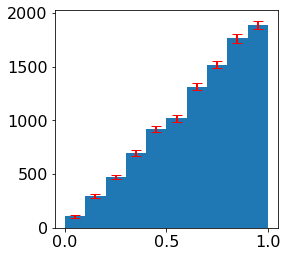

In [26]:
#10000 Samples
Nsamp=10000
counts=[]
for i in range(10):
    counts.append([])
for i in range(1000):
    rlist=np.zeros(int(Nsamp))
    for j in range(len(rlist)):
        rlist[j]=r.random()
    A=2
    xlist=inverseCDF(rlist)
    histogram=np.histogram(xlist, density=False)
    for j in range(len(histogram[0])):
        counts[j].append(histogram[0][j])
#calculates the middle of each bin for error bar plotting
bin_edges = hist[1]
bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]
#calculates the error as the standard deviation of the 1,000 trials
errors=[]
for i in counts:
    errors.append(np.std(np.array(i)))
#plots the histogram and error bars
plt.figure(figsize=(4,4))
histogram=plt.hist(xlist,range=[0,1])
plt.errorbar(bin_middles, histogram[0], yerr=errors, fmt='none', ecolor='red', elinewidth=2, capsize=5)
plt.show()

## Also show that you understand the values of the mean and standard deviation produced by your generator



In [93]:
# Calculating the sample mean

sample_mean = np.mean(values)
sample_stdev = np.std(values, ddof = 1)

print("Mean of randomly generated numbers:", sample_mean, "+/-", sample_stdev)

Mean of randomly generated numbers: 0.6667927382895029 +/- 0.2356740779499563


In [9]:
# Calculating the population mean

# integral of P(x) = Ax * x
pop_mean = A*1/3
pop_stdev = np.sqrt(A/4 - 2*A**2/9 + A**4/18) # which one is correct?
pop_stdev = np.sqrt(A/4 - A*2/9)

print("Mean of number distribution:", pop_mean, "+/-", pop_stdev)

Mean of number distribution: 0.6666666666666666 +/- 0.2357022603955159
